In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install Augmentor

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
from tensorflow import keras
import tensorflow as tf
import cv2
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from keras.models import load_model
from google.colab import files
import seaborn as sns
from PIL import Image
import random
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# 모든 이미지 파일 형식을 jpg로 바꿈
def convert_images_to_jpg(folder_path):
    image_files = glob(os.path.join(folder_path, '*'))

    for image_file in image_files:
        _, extension = os.path.splitext(image_file)

        if extension.lower() not in ['.jpg']:
            new_file_path = os.path.splitext(image_file)[0] + '.jpg'
            shutil.move(image_file, new_file_path)

    print("Conversion completed.")

folder_path_to_convert = "/content/drive/MyDrive/data/*"
convert_images_to_jpg(folder_path_to_convert)

Conversion completed.


In [5]:
building_fire = glob("/content/drive/MyDrive/data/건물 화재/*.jpg")
traffic_accident = glob("/content/drive/MyDrive/data/교통사고/*.jpg")
forest_fires = glob("/content/drive/MyDrive/data/산불/*.jpg")
car_fire = glob("/content/drive/MyDrive/data/차량 화재/*.jpg")

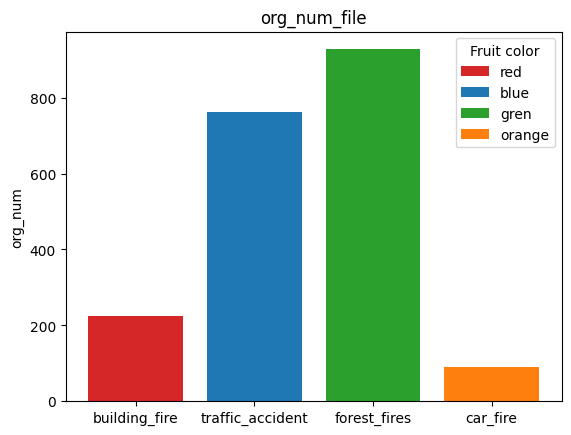

In [6]:
fig, ax = plt.subplots()

fruits = ['building_fire', 'traffic_accident', 'forest_fires', 'car_fire']
counts = [len(building_fire), len(traffic_accident), len(forest_fires), len(car_fire)]
bar_labels = ['red', 'blue', 'gren', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('org_num')
ax.set_title('org_num_file')
ax.legend(title='Fruit color')

plt.show()

In [7]:
def augment_data(input_folder, output_folder, augmentation_factor=4):
    # 입력 폴더의 이미지 파일 목록 가져오기
    file_names = os.listdir(input_folder)

    for file_name in file_names:
        # 이미지 경로 생성
        input_path = os.path.join(input_folder, file_name)

        # 이미지 읽기
        img = cv2.imread(input_path)

        # 이미지 읽기가 실패한 경우 건너뛰기
        if img is None:
            print(f"이미지를 읽을 수 없습니다: {input_path}")
            continue

        # 데이터 증강
        for i in range(augmentation_factor):
            augmented_img = img.copy()

            # 좌우 반전
            if np.random.rand() > 0.5:
                augmented_img = cv2.flip(augmented_img, 1)

            # 회전
            angle = np.random.randint(-20, 20)
            matrix = cv2.getRotationMatrix2D((img.shape[1]//2, img.shape[0]//2), angle, 1)
            augmented_img = cv2.warpAffine(augmented_img, matrix, (img.shape[1], img.shape[0]))

            # 밝기 조절 (옵션)
            brightness = np.random.uniform(0.7, 1.3)
            augmented_img = cv2.convertScaleAbs(augmented_img, alpha=brightness, beta=0)

            # 파일명 생성
            output_file_name = f"augmented_{file_name.split('.')[0]}_{i+1}.jpg"

            # 저장 경로 생성
            output_path = os.path.join(output_folder, output_file_name)

            # 이미지 저장
            cv2.imwrite(output_path, augmented_img)


if not os.path.exists("건물 화재1") and not os.path.exists("차량 화재1"):
  os.mkdir("건물 화재1")
  os.mkdir("차량 화재1")

  input_folder = '/content/drive/MyDrive/data/건물 화재'
  output_folder = '/content/건물 화재1'
  augmentation_factor = 4

  augment_data(input_folder, output_folder, augmentation_factor)

  input_folder = '/content/drive/MyDrive/data/차량 화재'
  output_folder = '/content/차량 화재1'
  augmentation_factor = 8

  augment_data(input_folder, output_folder, augmentation_factor)

In [8]:
building_fire = glob("/content/건물 화재1/*.jpg")
traffic_accident = glob("/content/drive/MyDrive/data/교통사고/*.jpg")
forest_fires = glob("/content/drive/MyDrive/data/산불/*.jpg")
car_fire = glob("/content/차량 화재1/*.jpg")

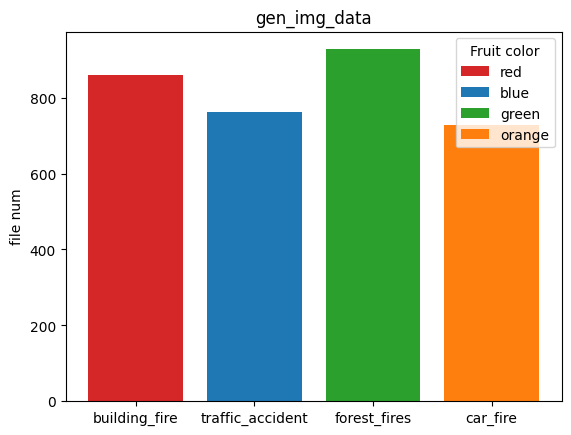

In [9]:
fig, ax = plt.subplots()

fruits = ['building_fire', 'traffic_accident', 'forest_fires', 'car_fire']
counts = [len(building_fire), len(traffic_accident), len(forest_fires), len(car_fire)]
bar_labels = ['red', 'blue', 'green', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('file num')
ax.set_title('gen_img_data')
ax.legend(title='Fruit color')

plt.show()

In [10]:
def num_print(a):
  print(len(a))

num_print(building_fire)
num_print(traffic_accident)
num_print(forest_fires)
num_print(car_fire)

860
761
928
728


In [11]:
def load_img(img_path):
  img_list = []
  for img in img_path:
    img = cv2.imread(img)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        img_list.append(img)
    else:
          print(f"필요 없는 놈은 죽어라!!: {img_path}")
  img_list = np.array(img_list)
  return img_list
building_fire = load_img(building_fire)
traffic_accident = load_img(traffic_accident)
forest_fires = load_img(forest_fires)
car_fire = load_img(car_fire)

필요 없는 놈은 죽어라!!: ['/content/drive/MyDrive/data/교통사고/102.jpg', '/content/drive/MyDrive/data/교통사고/1440x810_303133.jpg', '/content/drive/MyDrive/data/교통사고/103.jpg', '/content/drive/MyDrive/data/교통사고/104.jpg', '/content/drive/MyDrive/data/교통사고/101.jpg', '/content/drive/MyDrive/data/교통사고/37.jpg', '/content/drive/MyDrive/data/교통사고/85.jpg', '/content/drive/MyDrive/data/교통사고/a.jpg', '/content/drive/MyDrive/data/교통사고/31.jpg', '/content/drive/MyDrive/data/교통사고/27.jpg', '/content/drive/MyDrive/data/교통사고/92.jpg', '/content/drive/MyDrive/data/교통사고/60.jpg', '/content/drive/MyDrive/data/교통사고/38.jpg', '/content/drive/MyDrive/data/교통사고/65.jpg', '/content/drive/MyDrive/data/교통사고/89.jpg', '/content/drive/MyDrive/data/교통사고/88.jpg', '/content/drive/MyDrive/data/교통사고/74.jpg', '/content/drive/MyDrive/data/교통사고/99.jpg', '/content/drive/MyDrive/data/교통사고/43.jpg', '/content/drive/MyDrive/data/교통사고/79.jpg', '/content/drive/MyDrive/data/교통사고/29.jpg', '/content/drive/MyDrive/data/교통사고/83.jpg', '/content/drive/MyDri

In [12]:
def target_gen(len_num, target_list, target_cat):
  b = len_num
  for i in range(b):
    target_list.append(target_cat)
  target_array = np.array(target_list)
  img_list.clear()
  return target_array

img_list = []

building_fire_target = target_gen(len(building_fire), img_list, 1)
traffic_accident_target = target_gen(len(traffic_accident), img_list, 3)
forest_fires_target = target_gen(len(forest_fires), img_list, 2)
car_fire_target = target_gen(len(car_fire), img_list, 0)

In [13]:
target_data = np.concatenate([building_fire_target, traffic_accident_target, forest_fires_target, car_fire_target], axis=0)
print(target_data.shape)

(3276,)


In [14]:
train_data = np.concatenate([building_fire, traffic_accident, forest_fires, car_fire], axis=0)
print(train_data.shape)

(3276, 224, 224, 3)


In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(train_data, target_data, test_size=0.2, shuffle=True)
X_train, X_test, Y_train, Y_test = train_test_split(train_data, target_data, test_size=0.1, shuffle=True)

In [16]:
base_model = tf.keras.applications.ResNet50(weights="imagenet", include_top=False,
                                           input_tensor = keras.layers.Input(shape = (224, 224, 3)))

In [17]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [18]:
fine_tuning_dt = 140

In [19]:
for layer in base_model.layers[:fine_tuning_dt]:
  layer.trainable = False

In [20]:
base_model.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [21]:
head_model = base_model.output
head_model = keras.layers.Flatten()(head_model)
head_model = keras.layers.Dense(units = 4096, activation="relu")(head_model)
head_model = keras.layers.Dropout(rate = 0.2)(head_model)
head_model = keras.layers.Dense(units = 2048, activation="relu")(head_model)
head_model = keras.layers.Dropout(rate = 0.2)(head_model)
head_model = keras.layers.Dense(units = 1024, activation="relu")(head_model)
head_model = keras.layers.Dropout(rate = 0.2)(head_model)
head_model = keras.layers.Dense(units = 512, activation="relu")(head_model)
head_model = keras.layers.Dropout(rate = 0.2)(head_model)
head_model = keras.layers.Dense(4, activation="softmax")(head_model)

In [22]:
model = Model(inputs = base_model.input, outputs = head_model)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# initial_learning_rate = 0.01
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True)

# optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5)

In [23]:
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [24]:
history = model.fit(X_train, Y_train, epochs = 1000, batch_size=64, validation_data=[X_val, Y_val], callbacks=[early_stopping])

Epoch 1/1000
47/47 [==============================] - 49s 586ms/step - loss: 0.6065 - accuracy: 0.7761 - val_loss: 0.0582 - val_accuracy: 0.9787
Epoch 2/1000
47/47 [==============================] - 22s 458ms/step - loss: 0.0833 - accuracy: 0.9725 - val_loss: 0.0105 - val_accuracy: 0.9970
Epoch 3/1000
47/47 [==============================] - 22s 463ms/step - loss: 0.0292 - accuracy: 0.9895 - val_loss: 0.0028 - val_accuracy: 0.9985
Epoch 4/1000
47/47 [==============================] - 23s 481ms/step - loss: 0.0245 - accuracy: 0.9929 - val_loss: 6.6872e-04 - val_accuracy: 1.0000
Epoch 5/1000
47/47 [==============================] - 21s 445ms/step - loss: 0.0085 - accuracy: 0.9990 - val_loss: 3.6942e-04 - val_accuracy: 1.0000
Epoch 6/1000
47/47 [==============================] - 19s 414ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 4.9087e-04 - val_accuracy: 1.0000
Epoch 7/1000
47/47 [==============================] - 21s 455ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 2.2

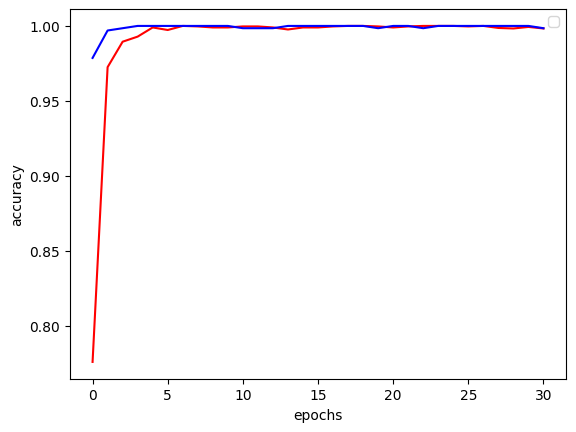

In [25]:
plt.plot(history.history['accuracy'], "r")
plt.plot(history.history['val_accuracy'], "b")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

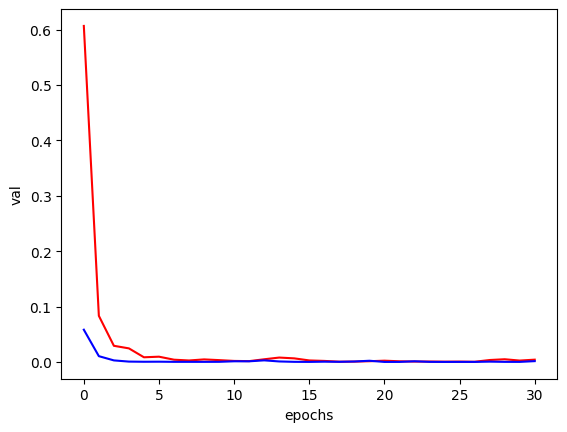

In [26]:
plt.plot(history.history['loss'], "r")
plt.plot(history.history['val_loss'], "b")
plt.xlabel("epochs")
plt.ylabel("val")
plt.show()

In [ ]:
model.save('옛다111.h5')

In [27]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

11/11 [==============================] - 4s 137ms/step


<Axes: >

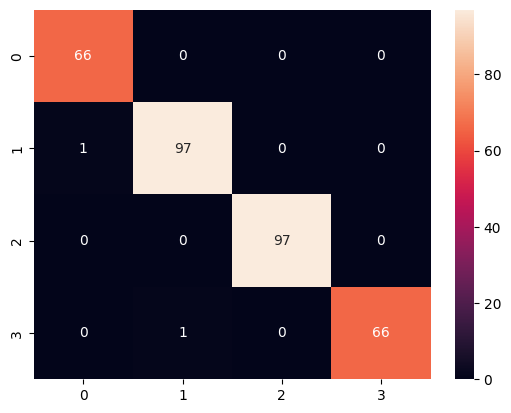

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True)

In [29]:
# # 폴더 삭제 코드
# def delete_folder(folder_path):
#     try:
#         shutil.rmtree(folder_path)
#         print(f"삭제완!: {folder_path}")
#     except Exception as e:
#         print(f"삭제 불가능: {e}")

# folder_to_delete = '/content/건물 화재1'
# delete_folder(folder_to_delete)
# folder_to_delete = '/content/차량 화재1'
# delete_folder(folder_to_delete)